In [50]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from utils import index_to_combination, find_file_by_stem
from tqdm import tqdm

In [42]:
beatmap_fns = sorted(list(Path('osu_dataset/beatmap/4keys/').glob('*.pt')))
audio_fns = sorted(list(Path('osu_dataset/audio/').glob('*.pt')))

In [51]:
phases = []
difficulties = []

for beatmap_fn in tqdm(beatmap_fns):
    audio_fn = find_file_by_stem(audio_fns, beatmap_fn.stem.split('-')[0])
    if audio_fn == -1:
        continue
    beatmap = torch.load(beatmap_fn)
    audio = torch.load(audio_fn)
    onsets = beatmap['onsets']
    beat_phase = audio['beat_phase']
    phases += beat_phase[onsets > 0].tolist()
    difficulties.append(beatmap['difficulty'] * 0.2)

100%|██████████| 1126/1126 [00:04<00:00, 251.44it/s]


(array([1.48867e+05, 3.62080e+04, 1.90000e+01, 1.30000e+02, 8.10000e+01,
        8.30000e+01, 6.10000e+02, 1.60000e+02, 7.13000e+02, 1.57000e+02,
        3.40000e+01, 6.38400e+03, 3.61040e+04, 2.87400e+03, 2.30000e+01,
        9.41000e+02, 3.77100e+03, 5.79000e+02, 7.97000e+02, 1.74000e+02,
        1.01000e+02, 2.76000e+02, 4.36000e+02, 4.34300e+04, 1.91342e+05,
        2.16480e+04, 7.00000e+00, 1.26000e+02, 7.60000e+01, 1.61000e+02,
        7.37000e+02, 1.18200e+03, 4.71300e+03, 7.61000e+02, 4.10000e+01,
        8.97300e+03, 4.92160e+04, 4.65700e+03, 2.30000e+01, 2.80000e+02,
        1.25300e+03, 2.07000e+02, 1.06500e+03, 1.92000e+02, 1.25000e+02,
        2.76000e+02, 6.34000e+02, 1.91135e+05]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48.]),
 <BarContainer 

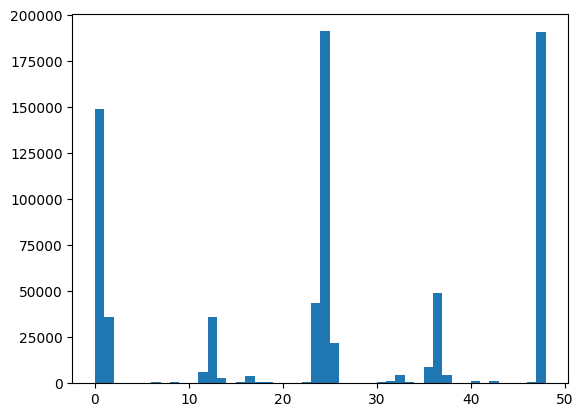

In [48]:
plt.hist(phases, bins=48)

(array([  0.,   0.,   0.,   0.,   5.,  13.,  46., 112.,  71.,  71., 114.,
        111.,  52.,  51.,  71.,  90., 103.,  77.,  62.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

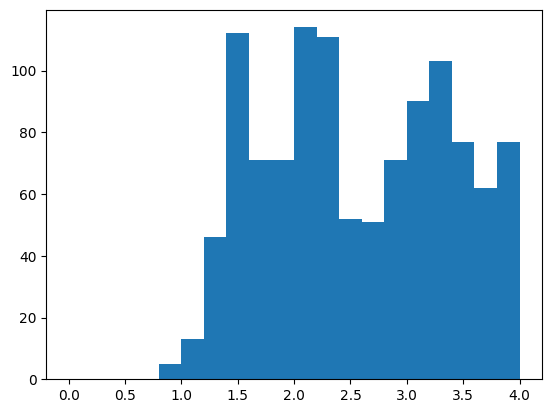

In [55]:
plt.hist(difficulties, bins=20, range=(0, 4))